In [3]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import matplotlib.pyplot as plt
from spleeter.audio.adapter import AudioAdapter

from IPython.display import Audio

In [4]:
# Testfile path
#file = '/data/fma_medium/037/037159.mp3'
file = '/data/fma_medium/037/037859.mp3'

In [5]:
# File Loader
y, sr = librosa.load(file, sr=44100, mono=False, duration=30.0)
print(y.shape)
Audio(y, rate=sr)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: '/data/fma_medium/037/037859.mp3'

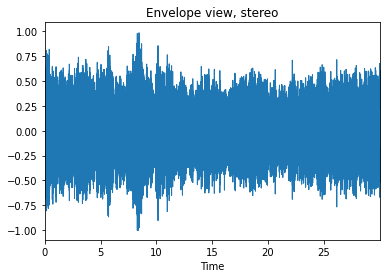

In [103]:
# Plot audio wave
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveplot(y, sr=44100, ax=ax)
ax.set(title='Envelope view, stereo')
ax.label_outer()

[[-22.462307 -28.998213 -31.12296  ... -34.049744 -29.082388 -25.33288 ]
 [-28.821764 -34.88377  -31.595396 ... -23.982231 -28.324535 -29.209547]
 [-29.346611 -24.841053 -23.904238 ... -15.932964 -17.875015 -23.047924]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


/usr/local/lib/python3.6/dist-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.6/dist-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.6/dist-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


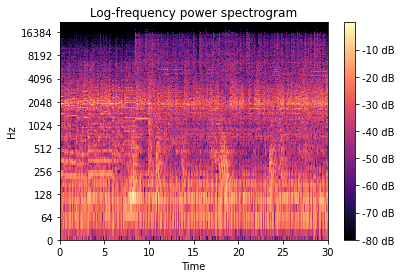

In [105]:
# Plot spectrogram
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.to_mono(y), hop_length=hop_length)), ref=np.max)
print(D)
img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [106]:
y_plus_10db = np.stack((
    (y[0] * 10 ** (10.0 / 20)),
    (y[0] * 10 ** (10.0 / 20))
))

Audio(y_plus_10db, rate=sr)

/usr/local/lib/python3.6/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


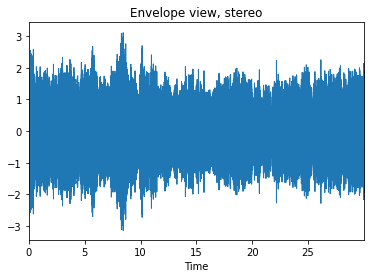

In [107]:
# Plot audio wave
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveplot(y_plus_10db, sr=44100, ax=ax)
ax.set(title='Envelope view, stereo')
ax.label_outer()

[[-17.574615 -14.928242 -13.383358 ... -18.927322 -20.466122 -12.321529]
 [-26.410095 -20.41782  -17.672207 ... -18.021595 -22.610989 -16.586964]
 [-25.432648 -23.987484 -24.964375 ... -15.030914 -18.011398 -27.064112]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


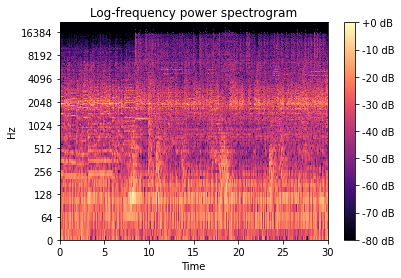

In [108]:
# Plot spectrogram
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

hop_length = 1024
D = librosa.amplitude_to_db(librosa.stft(librosa.to_mono(y_plus_10db), hop_length=hop_length), ref=np.max)
print(D)
img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")